Codigo que no funciona maso menos.MÁS ABAJO ESTA EL QUE FUNCIONA MEJOR

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

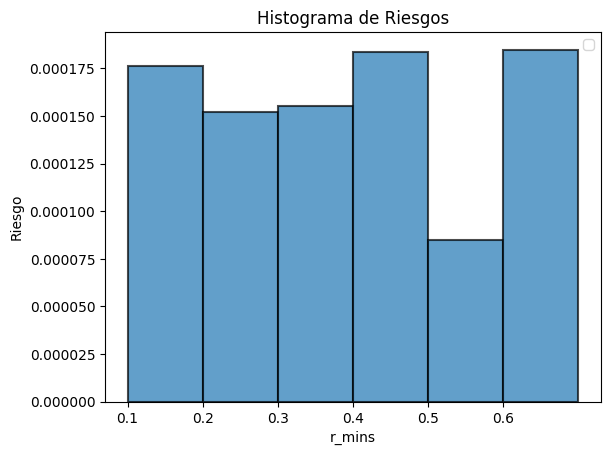

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

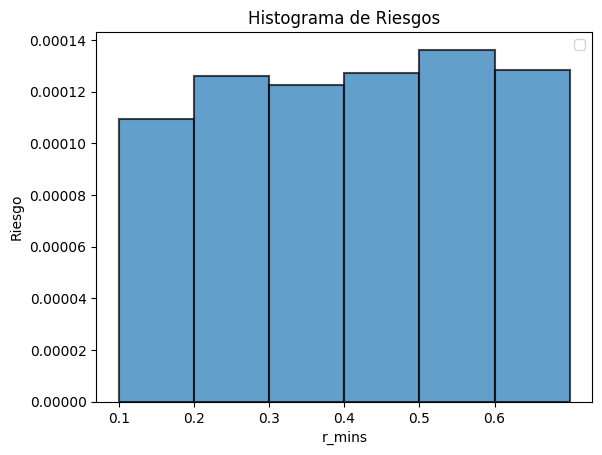

In [3]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Montar el drive y cargar los datos
drive.mount('/content/drive')
folder_path = '/content/drive/My Drive/Colab Notebooks/'
file_name_X = 'retornos_historicos - TP4_retornos_historicos.csv'
file_path_X = folder_path + file_name_X

data_X = pd.read_csv(file_path_X, index_col=0, decimal=',')

Sigma = data_X.cov().values

def objective_function(x, Sigma):
    return x.T @ (Sigma @ x)

r = data_X.mean(axis=0)


def nonlinear_constraint_wrapper(x):
    return r.T @ x

def constraint_function(x):
    return np.sum(x)

def mix_optimo(x0, r_min):
  nonlinear_constraint = opt.NonlinearConstraint(nonlinear_constraint_wrapper, lb=r_min, ub=np.inf)
  constraint_sum1 = opt.LinearConstraint(np.ones(len(Sigma)), lb=1, ub=1)
  bounds = opt.Bounds(0, 1)
  result = opt.minimize(objective_function, x0, args=(Sigma,), constraints=[nonlinear_constraint, constraint_sum1], bounds=bounds, method='trust-constr')
  return result.x

def grafico_de_barras_riesgo(r_mins, risks):
    n, bins, patches = plt.hist(r_mins, weights=risks, bins=len(r_mins), edgecolor='black', linewidth=1.5, alpha=0.7, label=None)
    plt.xlabel('r_mins')
    plt.ylabel('Riesgo')
    plt.title('Histograma de Riesgos')
    plt.legend()
    plt.xticks(bins[:-1], r_mins)
    plt.show()

x0 = np.ones(len(data_X.columns)) / len(data_X.columns)

x1 = np.array([
    0.00223572, 0.00591845, 0.0114278, 0.01091387, 0.01202595, 0.00741706,
    0.0015934, 0.00047285, 0.01616547, 0.013963, 0.01471149, 0.0056911,
    0.01060372, 0.00072971, 0.00546579, 0.00938494, 0.00372051, 0.01065891,
    0.00874895, 0.01334521, 0.00738557, 0.01572364, 0.00995558, 0.00836114,
    0.01014402, 0.00563067, 0.00997137, 0.00500555, 0.00197941, 0.01173007,
    0.0073557, 0.01738787, 0.00759428, 0.00203809, 0.00690903, 0.0145895,
    0.01543975, 0.00591607, 0.01672873, 0.01317042, 0.00959348, 0.00153942,
    0.01282186, 0.00137789, 0.01772595, 0.0127751, 0.01275813, 0.01378585,
    0.00850294, 0.0082958, 0.00285468, 0.01803801, 0.01499966, 0.00471161,
    0.00252443, 0.00800939, 0.01500748, 0.01775261, 0.01616081, 0.01168338,
    0.00317534, 0.00946659, 0.01484021, 0.0131317, 0.01669558, 0.0094967,
    0.0085672, 0.01401787, 0.01440546, 0.00852383, 0.01284523, 0.00737397,
    0.01231075, 0.01082498, 0.01036736, 0.00177239, 0.01363571, 0.00564827,
    0.01701346, 0.00328829, 0.01790782, 0.01814719, 0.0111362, 0.01145429,
    0.00835862, 0.01351243, 0.01433879, 0.00442924, 0.00467877, 0.01494763,
    0.01135904, 0.00851886, 0.01538891, 0.00991745, 0.00385694, 0.01418064,
    0.00578108, 0.0102471, 0.01111183, 0.01419747
])

risk = []
r_mins = [0.1,0.2,0.3,0.4,0.5,0.6]
for r_min in r_mins:
    mix = mix_optimo(x0, r_min)
    risk.append(objective_function(mix, Sigma))

grafico_de_barras_riesgo(r_mins, risk)

risk = []
for r_min in r_mins:
    mix = mix_optimo(x1, r_min)
    risk.append(objective_function(mix, Sigma))

grafico_de_barras_riesgo(r_mins, risk)

In [ ]:
risk = []
r_mins = [0.1, 0.2, 0.4, 0.8, 1.6]
for r_min in r_mins:
    mix = mix_optimo(x0, r_min)
    risk.append(objective_function(mix, Sigma))

grafico_de_barras_riesgo(r_mins, risk)

risk = []
for r_min in r_mins:
    mix = mix_optimo(x1, r_min)
    risk.append(objective_function(mix, Sigma))

grafico_de_barras_riesgo(r_mins, risk)

CODIGO QUE FUNCIONA MEJOR

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

def optimize_portfolio(r_min, Sigma, r):
    n = len(r)
    x0 = np.ones(n) / n

    def objective_function(x, Sigma):
        return x.T @ (Sigma @ x)

    def constraint_function(x, r_min, r):
        return r @ x - r_min


    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                   {'type': 'ineq', 'fun': lambda x: constraint_function(x, r_min, r)})

    # constraint_sum1 = opt.NonlinearConstraint(constraint_function, lb=1, ub=1)
    # nonlinear_constraint = opt.NonlinearConstraint(constraint_function, lb=r_min, ub=np.inf, args=(r_min, r))
    bounds = opt.Bounds(0, 1)

    result = opt.minimize(objective_function, x0, args=(Sigma,), constraints=constraints, bounds=bounds, method='trust-constr', options={'disp': True})
    optimal_portfolio= result
    risk = result.fun

    return optimal_portfolio, risk

rmin = 0.1
risks = []

optimal_portfolio, risk = optimize_portfolio(rmin, Sigma, r)
risks.append(risk)

def risk_barplot(r_mins, risks):
    n, bins, patches = plt.hist(r_mins, weights=risks, bins=len(r_mins), linewidth=1.5, alpha=0.7, label=None)
    plt.xlabel('r_mins')
    plt.ylabel('Riesgo')
    plt.title('Histograma de Riesgos')
    plt.legend()
    plt.xticks(bins[:-1], r_mins)
    plt.show()

print(optimal_portfolio.x)
print(optimal_portfolio.fun)
# Visualización del riesgo en función de r_min
# risk_barplot(rmin_values, risks)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`xtol` termination condition is satisfied.
Number of iterations: 269, function evaluations: 46763, CG iterations: 6620, optimality: 2.08e+00, constraint violation: 0.00e+00, execution time: 1.6e+01 s.
[8.58544949e-03 1.41403121e-02 1.36554918e-02 1.08213794e-03
 1.13085362e-02 1.60400266e-03 9.45093143e-03 4.28588267e-03
 1.31281709e-02 1.14477004e-02 9.83731787e-03 7.51278238e-03
 1.20967121e-02 1.31763960e-03 1.19503825e-02 1.33326413e-02
 1.14601671e-02 1.13097789e-02 1.26992776e-02 1.42728630e-02
 7.54885836e-03 9.51784786e-03 1.12797711e-02 2.00028936e-02
 1.34931340e-02 5.17176639e-03 1.46549166e-02 1.95040661e-02
 1.28428352e-02 1.62422493e-02 1.34533807e-02 1.07562165e-02
 2.15368220e-03 1.84871853e-02 1.51707048e-02 1.02643937e-02
 1.29945922e-02 6.28639800e-03 9.98447858e-03 1.33953553e-02
 4.96769586e-03 8.27147251e-03 9.79101528e-03 1.31372110e-02
 5.59838767e-03 3.86998696e-03 4.72845958e-03 1.40739358e-02
 1.99884592e-07 9.89182037e-03 1.04798313e-02 5.49036656e-03
 1.443

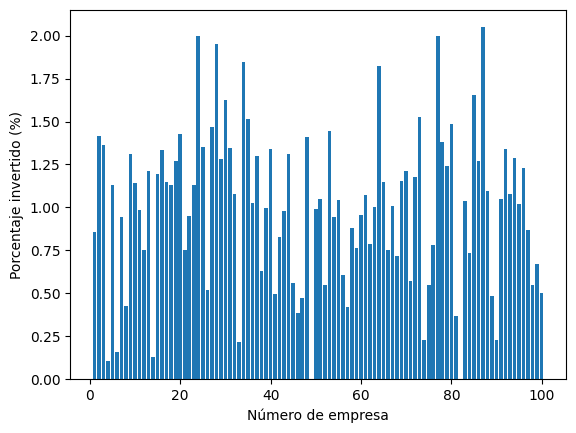

In [38]:
def business_investment(businesses, investments):
    businesses = [int(business.split(' ')[1]) for business in businesses]
    investments = [investment * 100 for investment in investments]
    plt.bar(businesses, investments)
    plt.xlabel('Número de empresa')
    plt.ylabel('Porcentaje invertido (%)')
    plt.show()



business_investment(data_X.columns, optimal_portfolio.x)